Каирова Екатеринга ТФэ-01-21
Домашняя работа 2
Задание 1

Построить график зависимости термического КПД от давления промежуточного перегрева водяного пара для условий примера: Р
=12 МПа; 
=530 °С; Рк
=5 кПа. Параметры промперегрева: Рпп
=1, 2, 3, 4, 5, 6 МПа; пп
=530 °С.

In [8]:
import iapws
from iapws import IAPWS97 as gas

In [9]:
import math
import matplotlib.pyplot as plt

In [10]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [11]:
p_0 = 12 * MPa
t_0 = to_kelvin(530)
p_k = 5 * kPa
p_middle_list = [1, 2, 3, 4, 5, 6] 
t_middle = to_kelvin(530)

In [12]:
def cycl(p_middle):
    p_middle = p_middle * MPa
    point_0_start = gas(P=p_0 * unit, T=t_0)
    point_0_end = gas(P=p_middle * unit, s=point_0_start.s)
    point_1_start = gas(P=p_middle * unit, T=t_middle)
    point_condenser = gas(P=p_k * unit, s=point_1_start.s)
    point_pump = gas(P=p_k * unit, x=0)
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    efficiency = useful_energy / full_energy
    return efficiency

In [13]:
x_val = [p_middle for p_middle in p_middle_list]
y_val = [cycl(p_middle) for p_middle in p_middle_list]

Text(0, 0.5, 'n_th')

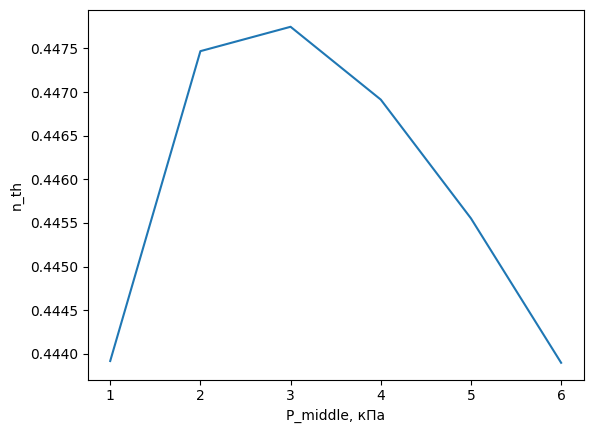

In [14]:
plt.plot(x_val, y_val)
plt.xlabel('P_middle, кПа')
plt.ylabel('n_th')